<a href="https://colab.research.google.com/github/phmouras/Critical-Phenomena-in-gravitational-collapse-via-spectral-methods/blob/main/Origin_MSSC_N500_filter_Potential_working.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

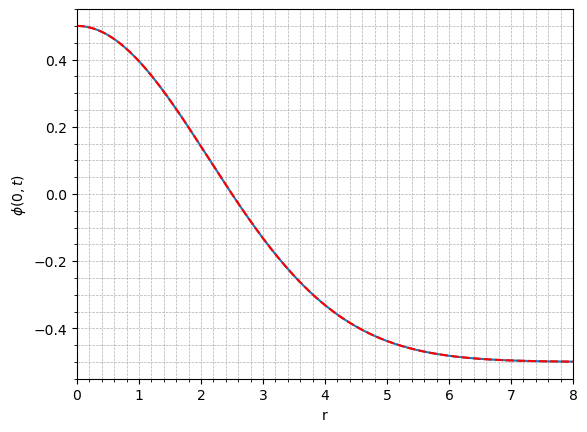

In [10]:
import numpy as np
#import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import math


N = 300                                                   # Truncation ordem

L0 = 5                                             # Map parameter

col = np.cos(np.arange(2*N + 4)*math.pi /(2*N + 3))     # collocation points (Verificado)

colr = col[1:N+2]                                                         # physical domain (Verificado)

r1 = L0 * colr/(np.sqrt(1-colr**2))
r = np.flip(r1)                                           # physical domain (Verificado)

#out_r = open('r_30_L02.txt', 'a')
#out_r.write(' ' +' '.join(str('%.18f'%n) for n in r)+'\n')
#out_r.close()


# Base Matrix (Tchebyshev Polinomials):

SB = np.zeros([N+2,N+1])
rSB = np.zeros([N+2,N+1])
rrSB = np.zeros([N+2,N+1])


for i in range(N+1+1):                                    # SB[:,0] = function in origin
  SB[i,] = np.sin((2*i+1)*np.arctan(L0/r))

for i in range(N+1+1):
  rSB[i,] = -np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**2*(1+L0**2/r**2))

for i in range(N+1+1):
  rrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/r))*(2*i+1)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0**3/(r**5*(1+L0**2/r**2)**2)

# Base function



psi = SB[0:N+1,:]        # origin included in psi[:,0]
rpsi = rSB[0:N+1,:]
rrpsi = rrSB[0:N+1,:]



# Initial conditions of Phi (Scalar field)

#r0 = 0

#sigma = 1/2

# L0 = 1 and sigma = 1/2 and Phi_init = A0*(np.exp(-(r-r0)**2/sigma**2) + np.exp(-(r+r0)**2/sigma**2))

#A0 =  0.76  #  0.7602785  -> disperse ;  # 0.77 -> colapse

# L0 = 3 and sigma = 1/2 and Phi_init = A0*(np.exp(-(r-r0)**2/sigma**2) + np.exp(-(r+r0)**2/sigma**2))

#A0 =  0.75981136951800  #  0.759811369518  -> disperse ;  # 0.759811369518001   -> colapse

Phi_c = 1/2  # 

Phi_vac = -1/2 # field phi at infinity

R0 = 3.0  # 0.05 -> disperse ;  # 0.  -> colapse   A0 substitution

Phi_init = (Phi_c - Phi_vac)*np.exp(-r**2/R0**2) + Phi_vac          # Phi initial data out of origin (Verificado)

inv_psi = np.linalg.inv(psi)

a0 = np.dot(Phi_init, inv_psi)  # coeficients a(0)  (Verificado)

#out_a = open('a0_30_L02.txt', 'a')
#out_a.write(' ' +' '.join(str('%.18f'%n) for n in a0)+'\n')
#out_a.close()


Phi = np.dot(a0, psi)        # approximative solution in t = 0
rPhi= np.dot(a0, rpsi)

########################### Plot: Initial Conditions of Phi

M = 3000       # plot truncation

rplot = np.linspace(0.00000000000000001,15,M)

colplot = rplot/np.sqrt(L0**2 + rplot**2)

SBplot = np.zeros([N+1,M])
rSBplot = np.zeros([N+1,M])
rrSBplot = np.zeros([N+1,M])

for i in range(N+1):
  SBplot[i,] = np.sin((2*i+1)*np.arctan(L0/rplot))

for i in range(N+1):
  rSBplot[i,] = -np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0/(rplot**2*(1+L0**2/rplot**2))

for i in range(N+1):
  rrSBplot[i,] = -np.sin((2*i+1)*np.arctan(L0/rplot))*(2*i+1)**2*L0**2/(rplot**4*(1+L0**2/rplot**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0/(rplot**3*(1+L0**2/rplot**2))-2*np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0**3/(rplot**5*(1+L0**2/rplot**2)**2)

psiplot = SBplot[0:(N+1),:]
rpsiplot = rSBplot[0:(N+1),:]
rrpsiplot = rrSBplot[0:(N+1),:]

Phiplot_init = (Phi_c - Phi_vac)*np.exp(-rplot**2/R0**2) + Phi_vac

#Phiplot_init = np.hstack((0, Phiplot_int))

Phiplot = np.dot(a0, psiplot)

plt.plot(rplot, Phiplot, rplot, Phiplot_init, "--r")   #(Verificado)
plt.xlabel('r')
plt.ylabel(r"$\phi(0,t)$")
plt.xlim(0,8)
plt.grid(which='both', linestyle='--', linewidth=0.5)  # Grades principais
plt.minorticks_on()  # Ativa grades menores
plt.show()




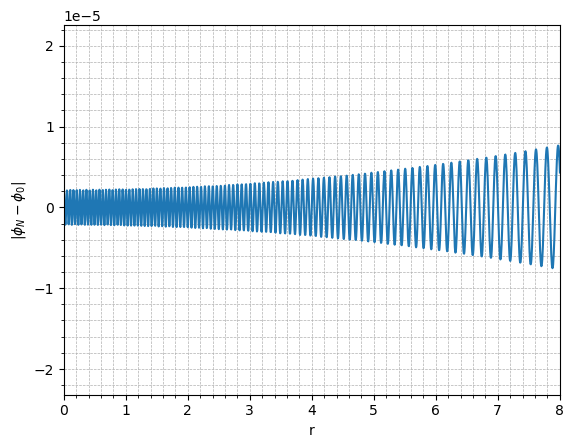

In [12]:
erro = Phiplot_init - Phiplot

plt.plot(rplot, erro)
plt.xlabel('r')
plt.xlim(0,8)
plt.ylabel(r"$|\phi_N - \phi_0|$")
plt.grid(which='both', linestyle='--', linewidth=0.5)  
plt.minorticks_on() 
plt.show()

In [3]:
Pi_0 = np.zeros(N+1)
b0 = np.dot(Pi_0, psi)
Pi = np.dot(b0, psi)

c0 = np.zeros([N+1])     # guess value
for i in range(N+1):
  c0[i] = 0.0001

def V(Phi):
  return 1/4*(Phi**2 - Phi_vac**2)**2

def dV(Phi):
  return Phi**3 - Phi_vac**2*Phi


tol = 1e-18
#cnew = 0
#err = abs(c0 - cnew)

n = 0
nf = 500

# Newton Raphson loop
#while max(err) >= tol:
while n <= nf:
  Chi = np.dot(c0, psi)
  rChi = np.dot(c0 ,rpsi)
  rrChi = np.dot(c0, rrpsi)
  H0 = 4*rChi**2 + 4*rrChi + 8/r*rChi + 1/2*rPhi**2 + np.exp(4*Chi)*V(Phi)
  J1 = rChi*rpsi
  JH = 8*J1 + 4*rrpsi + 8/r*rpsi + 4*np.exp(4*Chi)*rpsi*V(Phi)
  inv_JH = np.linalg.inv(JH)
  cnew = c0
  c0 = c0 - np.dot(H0, inv_JH)
  err = abs(c0 - cnew)
  if  max(err) <= tol:
    break
  else:
    n = n + 1


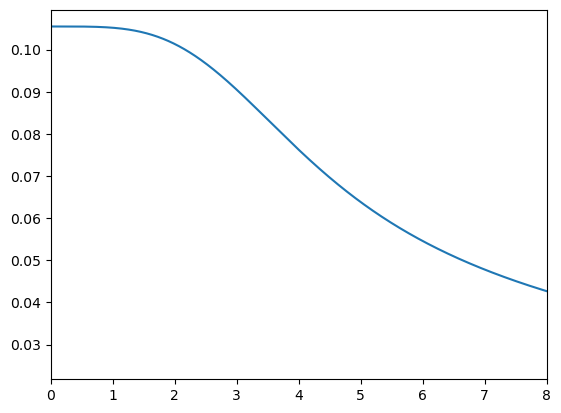

In [4]:

Chiplot = np.dot(c0, psiplot)


plt.plot(rplot,Chiplot)
plt.xlim(0,8)
plt.show()


In [5]:
#Equation for Krr: momentum constraint:

# Initial values of Krr: Base functions of Krr,

SB1 = 1/2*(SB[1:(N+2),:] + SB[0:(N+1),:])          # VERIFICADO,
rSB1 = 1/2*(rSB[1:(N+2),:] + rSB[0:(N+1),:])
rrSB1 = 1/2*(rrSB[1:(N+2),:] + rrSB[0:(N+1),:])


# Base functions for Beta

SB2 = np.zeros([N+1,N+1])     
rSB2 = np.zeros([N+1,N+1])
rrSB2 = np.zeros([N+1,N+1])

for i in range(N+1):                                                   # VERIFICADO,
  SB2[i,] = np.sin((2*(i+1/2)+1)*np.arctan(L0/r))                                                 

for i in range(N+1):
  rSB2[i,] = -np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0/(r**2*(1+L0**2/r**2))

for i in range(N+1):
  rrSB2[i,] = -np.sin((2*i+2)*np.arctan(L0/r))*(2*i+2)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0**3/(r**5*(1+L0**2/r**2)**2)




In [9]:
Nq = int(3/2*N)           # Quadrature truncation

gauss_quadrature = np.polynomial.legendre.leggauss(Nq + 1)

new_col = gauss_quadrature[0]            # Legendre quadrature points


# Legendre Polinomials

P = np.zeros([Nq+3,Nq+1])
colP = np.zeros([Nq+3,Nq+1])

P[0,] = 1
P[1,] = new_col

colP[0,] = 0
colP[1,] = 1

for i in range(2,Nq+3):
  P[i,] = ((2*i-1)*new_col*P[i-1,] - (i-1)*P[i-2,])/(i)

for i in range(2,Nq+3):
  colP[i,] = i*P[i-1] + new_col*colP[i-1]

P_max = P[Nq+1]

colP_max = colP[Nq+1]

wq_col = 2/((1-new_col**2)*colP_max**2)    # Legendre weight (Verificado)

rq = L0*(1+new_col)/(1-new_col)            # Physical quadrature domain

qSB = np.zeros([Nq+1,Nq+1])
qrSB = np.zeros([Nq+1,Nq+1])
qrrSB = np.zeros([Nq+1,Nq+1])


for i in range(Nq+1):
  qSB[i,] = np.sin((2*i+1)*np.arctan(L0/rq))

for i in range(Nq+1):
  qrSB[i,] = -np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**2*+L0**2)

for i in range(Nq+1):
  qrrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/rq))*(2*i+1)**2*L0**2/(rq**4*(1+L0**2/rq**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**3*(1+L0**2/rq**2))-2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0**3/(rq**5*(1+L0**2/rq**2)**2)

qpsi = qSB[0:N+1,:]
rqpsi = qrSB[0:N+1,:]
rrqpsi = qrrSB[0:N+1,:]


qSB1 = 1/2*(qSB[1:(N+2),:] + qSB[0:(N+1),:])          # VERIFICADO
rqSB1 = 1/2*(qrSB[1:(N+2),:] + qrSB[0:(N+1),:])
rrqSB1 = 1/2*(qrrSB[1:(N+2),:] + qrrSB[0:(N+1),:])


def qV(qPhi):
  return 1/4*(qPhi**2 - Phi_vac**2)**2

# Initial Phi in quadrature points

#qPhi = np.dot(a0, qpsi)
#rqPhi= np.dot(a0, rqpsi)

# Initial Pi for quadrature points

#qPi = np.dot(b0, qpsi)


# Initial Chi for quadrature points:

#qChi = np.dot(c0, qpsi)   # Verificado todos
#rqChi = np.dot(c0, rqpsi)
#rrqChi = np.dot(c0, rrqpsi)

# Initial values of Krr:

#qKrr = np.dot(ck0, qSB1)

# Alpha na origem

#Alphacenter = (-1)**(np.arange(N+1))


In [7]:
# Filtering

Nc = 0

Nf = N - Nc

coef_f = 36
s = 6

#filter1 = np.ones(N+1)
filter1 = np.exp(- coef_f*((np.arange(N - Nc + 1))/(N-Nc))**s)   # FILTER WITH PARAMETER s

In [10]:
# Runge Kutta 4th order
    
h = 0.0002   # step size
tf = 200
    
It = int(tf/h)
    
#t1 = np.linspace(0 tf It) 
    
t = 0
    
Madm = []
Alpha_origin = []
phi_origin = []
L2HC = []
L2MC = []
phi_set = []
Madm_error = []
    
out_a = open('Alpha_origin.txt','a')
out_a.truncate(0)                        # arase the old datas and start the new ones

out_p = open('phi_origin.txt','a')
out_p.truncate(0)

#V = 0

M0 = 2*np.dot(np.arange(1,2*N + 2,2),c0) # Madm(t = 0)
    
np.random.seed(123)     
        
while t <= tf:     
  # First step
  Phi = np.dot(a0,psi)      
  rPhi = np.dot(a0,rpsi)
  rrPhi = np.dot(a0,rrpsi)      
  Pi = np.dot(b0,psi) 
  rPi= np.dot(b0,rpsi)
  Chi = np.dot(c0,psi) 
  rChi = np.dot(c0,rpsi)
  rrChi = np.dot(c0,rrpsi)   
  Matrix_Krr = 2*rChi*SB1 + rSB1 + 3/r*SB1 
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi*rPhi*np.exp(4*Chi)
  ck0 = np.dot(rhsk,inv_matrix_krr)
  Krr = np.dot(ck0,SB1) 
  rKrr = np.dot(ck0,rSB1)
  Matrix_Alpha = rrpsi + 2*(1/r + rChi)*rpsi - 3/2*np.exp(-4*Chi)*Krr**2*psi - np.exp(4*Chi)*(Pi**2 - V(Phi))*psi 
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V(Phi))
  al0 = np.dot(rhsal,inv_matrix_alpha)
  Alpha = 1 + np.dot(al0,psi)
  rAlpha = np.dot(al0,rpsi)
  rrAlpha = np.dot(al0,rrpsi)
  Matrix_Beta = rSB2/r - SB2/r**2
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha*np.exp(-4*Chi)*Krr/r
  be0 = np.dot(rhsbe ,inv_matrix_beta)
  Beta = np.dot(be0,SB2)
  rBeta = np.dot(be0,rSB2)
  db = np.dot(Beta*rPi + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha*dV(Phi),inv_psi)
  dc = np.dot(Beta*rChi + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr,inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi,inv_psi)   
  K1 = h*(dc)
  L1 = h*(da)
  N1 = h*(db)

  # L2-error associated to the Hamiltonian constraint
  qPhi = np.dot(a0,qpsi)      
  rqPhi= np.dot(a0,rqpsi)
  qPi = np.dot(b0,qpsi) 
  qChi = np.dot(c0,qpsi)
  rqChi = np.dot(c0,rqpsi)
  rrqChi = np.dot(c0,rrqpsi) 
  qKrr = np.dot(ck0,qSB1)
  H = 4*rqChi**2 + 4*rrqChi + 8*rqChi/rq + 3/4*np.exp(-4*qChi)*qKrr**2 + np.exp(4*qChi)*(1/2*qPi**2 + np.exp(-4*qChi)/2*rqPhi**2 + qV(qPhi))   # Hamiltonian constraint (HC)
  L2HC.append((1/2*np.dot(H**2,wq_col))**(1/2))    # L2 error of HC 

  # L2-error associated to the momentum constraint
  rqKrr = np.dot(ck0,rqSB1)  
  M = 2*rqChi*qKrr + rqKrr + 3/rq*qKrr + qPi*rqPhi*np.exp(4*qChi)
  L2MC.append((1/2*np.dot(M**2,wq_col))**1/2)    # L2 error of HC 

  # Alpha origin
  Alpha_0 = 1 + np.dot(al0, psi[:,0])
  Alpha_origin.append(Alpha_0)                   # = Alphacenter in matlab
  out_a.write(str(t) + " " + str(Alpha_0))
  out_a.write(',\n')

  # Phi origin:
  phi_0 = np.dot(a0, psi[:,0])
  phi_origin.append(phi_0)
  out_p.write(str(t) + " " + str(phi_0))
  out_p.write(',\n')

  # Error ADM mass:
  Madm = 2*np.dot(np.arange(1,2*N + 2,2),c0)
  Madm_pc = abs(Madm - M0)/M0 * 100  
  Madm_error.append(Madm_pc)  

  # Second step
  Phi = np.dot(a0 + L1/2,psi)     
  rPhi= np.dot(a0 + L1/2 ,rpsi)
  rrPhi = np.dot(a0 + L1/2,rrpsi) 
  Pi = np.dot(b0 + N1/2,psi)
  rPi= np.dot(b0 + N1/2,rpsi)
  Chi = np.dot(c0 + K1/2,psi)
  rChi = np.dot(c0 + K1/2,rpsi)
  rrChi = np.dot(c0 + K1/2,rrpsi)
  Matrix_Krr = 2*rChi*SB1 + rSB1 + 3/r*SB1 
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi*rPhi*np.exp(4*Chi)
  ck0 = np.dot(rhsk,inv_matrix_krr)
  Krr = np.dot(ck0,SB1) 
  rKrr = np.dot(ck0,rSB1)
  Matrix_Alpha = rrpsi + 2*(1/r + rChi)*rpsi - 3/2*np.exp(-4*Chi)*Krr**2*psi - np.exp(4*Chi)*(Pi**2 - V(Phi))*psi 
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V(Phi))
  al0 = np.dot(rhsal,inv_matrix_alpha)
  Alpha = 1 + np.dot(al0,psi)
  rAlpha = np.dot(al0,rpsi)
  rrAlpha = np.dot(al0,rrpsi)
  Matrix_Beta = rSB2/r - SB2/r**2
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha*np.exp(-4*Chi)*Krr/r
  be0 = np.dot(rhsbe ,inv_matrix_beta)
  Beta = np.dot(be0,SB2)
  rBeta = np.dot(be0,rSB2)
  db = np.dot(Beta*rPi + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha*dV(Phi),inv_psi)
  dc = np.dot(Beta*rChi + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr,inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi,inv_psi)   
  K2 = h*(dc)
  L2 = h*(da)
  N2 = h*(db)

  # Third step
  Phi = np.dot(a0 + L2/2,psi)     
  rPhi = np.dot(a0 + L2/2,rpsi)
  rrPhi = np.dot(a0 + L2/2,rrpsi) 
  Pi = np.dot(b0 + N2/2,psi)
  rPi= np.dot(b0 + N2/2,rpsi)
  Chi = np.dot(c0 + K2/2,psi)
  rChi = np.dot(c0 + K2/2,rpsi)
  rrChi = np.dot(c0 + K2/2,rrpsi)
  Matrix_Krr = 2*rChi*SB1 + rSB1 + 3/r*SB1 
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi*rPhi*np.exp(4*Chi)
  ck0 = np.dot(rhsk,inv_matrix_krr)
  Krr = np.dot(ck0,SB1) 
  rKrr = np.dot(ck0,rSB1)
  Matrix_Alpha = rrpsi + 2*(1/r + rChi)*rpsi - 3/2*np.exp(-4*Chi)*Krr**2*psi - np.exp(4*Chi)*(Pi**2 - V(Phi))*psi 
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V(Phi))
  al0 = np.dot(rhsal,inv_matrix_alpha)
  Alpha = 1 + np.dot(al0,psi)
  rAlpha = np.dot(al0,rpsi)
  rrAlpha = np.dot(al0,rrpsi)
  Matrix_Beta = rSB2/r - SB2/r**2
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha*np.exp(-4*Chi)*Krr/r
  be0 = np.dot(rhsbe ,inv_matrix_beta)
  Beta = np.dot(be0,SB2)
  rBeta = np.dot(be0,rSB2)
  db = np.dot(Beta*rPi + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha*dV(Phi),inv_psi)
  dc = np.dot(Beta*rChi + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr,inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi,inv_psi)   
  K3 = h*(dc)
  L3 = h*(da)
  N3 = h*(db) 

  # Forth step
  Phi = np.dot(a0 + L3,psi)     
  rPhi= np.dot(a0 + L3 ,rpsi)
  rrPhi = np.dot(a0 + L3,rrpsi) 
  Pi = np.dot(b0 + N3,psi)
  rPi= np.dot(b0 + N3,rpsi)
  Chi = np.dot(c0 + K3,psi)
  rChi = np.dot(c0 + K3,rpsi)
  rrChi = np.dot(c0 + K3,rrpsi)
  Matrix_Krr = 2*rChi*SB1 + rSB1 + 3/r*SB1 
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi*rPhi*np.exp(4*Chi)
  ck0 = np.dot(rhsk,inv_matrix_krr)
  Krr = np.dot(ck0,SB1) 
  rKrr = np.dot(ck0,rSB1)
  Matrix_Alpha = rrpsi + 2*(1/r + rChi)*rpsi - 3/2*np.exp(-4*Chi)*Krr**2*psi - np.exp(4*Chi)*(Pi**2 - V(Phi))*psi 
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V(Phi))
  al0 = np.dot(rhsal,inv_matrix_alpha)
  Alpha = 1 + np.dot(al0,psi)
  rAlpha = np.dot(al0,rpsi)
  rrAlpha = np.dot(al0,rrpsi)
  Matrix_Beta = rSB2/r - SB2/r**2
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha*np.exp(-4*Chi)*Krr/r
  be0 = np.dot(rhsbe ,inv_matrix_beta)
  Beta = np.dot(be0,SB2)
  rBeta = np.dot(be0,rSB2)
  db = np.dot(Beta*rPi + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha*dV(Phi),inv_psi)
  dc = np.dot(Beta*rChi + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr,inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi,inv_psi)   
  K4 = h*(dc)
  L4 = h*(da)
  N4 = h*(db)  

  t = t + h

#  if t > 9:
#    h=0.0001


  # Evolution functions
  a0 = (a0 + 1/6 * (L1 + 2*L2 + 2*L3 + L4))
  b0 = filter1*(b0 + 1/6 * (N1 + 2*N2 + 2*N3 + N4))
  c0 = filter1*(c0 + 1/6 * (K1 + 2*K2 + 2*K3 + K4))  
  phi_set.append(np.dot(a0,psiplot))
    
out_a.close()
out_p.close() 
    
t1 = np.linspace(0,tf,len(Alpha_origin)) 

In [ ]:
# Searching for critical amplitude:

plt.figure(figsize = (10,5))


plt.plot(t1, Alpha_origin, color = "g", label = f"$R_0$ = {R0}")
plt.ylabel(r"$\alpha(t,0)$")
plt.xlabel("t")
plt.grid()
plt.legend()

In [ ]:
plt.figure(figsize = (10,5))

plt.plot(t1, phi_origin, color = "b", label = f"$R_0$ = {R0}")

plt.ylabel("$\phi$(t,0)")
plt.xlabel("t")
plt.grid()
plt.legend()

In [ ]:
# Erro L2 of Hamiltonian constraint

plt.plot(t1,L2MC)
plt.yscale("log")
plt.ylabel("log(L2HC)")
plt.xlabel("t")
plt.grid()
plt.title("log(L2Hc) para $N = 200$, $L_0 = 20$ e $A_0 = $")

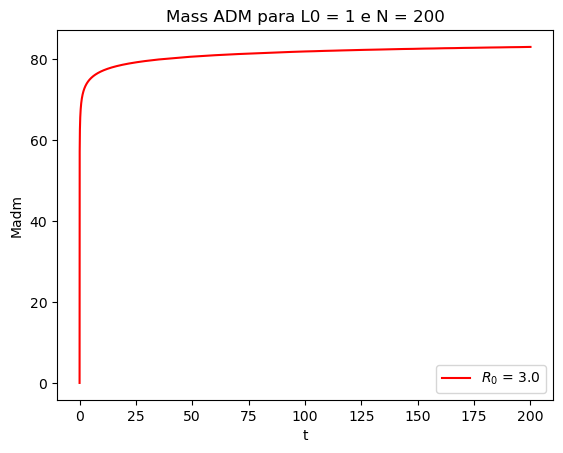

In [11]:
# Mass ADM error

plt.plot(t1, Madm_error, color = "r", label = "$R_0$ = {:}".format(R0))
plt.title("Mass ADM para L0 = 1 e N = {:}".format(N) )
plt.ylabel("Madm")
plt.xlabel("t")  
#plt.yscale('log')
#plt.grid()
plt.legend() 

In [ ]:
# Plot 3D from scalar field at t = constant
from mpl_toolkits.mplot3d import Axes3D

# AJUSTAR PARÂMETROS PARA VISUALIZAÇÃO               

fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121, adjustable='box')  # Adjust proportions as needed
ax2 = fig.add_subplot(122,projection='3d')

M = 3000

y = phi_set[0] # 7 plots from t = 0, 2, 4, ..., 12 -> 1s = 571000
x = rplot
theta = np.linspace(0, 2*np.pi, M)    # Revolution of f(phi,r)

xn = np.outer(x, np.cos(theta))
yn = np.outer(x, np.sin(theta))
zn = np.zeros_like(xn)

for i in range(len(x)):
    zn[i,:] = np.full_like(zn[0,:], y[i])


ax2.plot_surface(xn, yn, zn)

#ax2.plot_surface(xn, yn, zn)
ax2.plot_surface(xn, yn, zn, rstride = 5, cstride = 5, cmap = 'magma', edgecolor = 'none')
ax1.plot(x, y)
ax1.grid()
ax1.set_xlabel('r')
ax1.set_ylim(-1.5, 1)
ax1.set_ylabel('$\phi_j(t,r)$')
#ax1.set_aspect('equal')
ax1.set_box_aspect(1)
ax2.set_xlabel('$r$')
ax2.set_ylabel('$r$')
ax2.set_zlim(-1, 1)
#ax2.set_zlabel('$\phi$')




plt.subplots_adjust(wspace=0.1)

ax2.grid(False)
#plt.axis('off')
plt.show()

In [ ]:
# Animation plot for Phi: Scalar Field
        
from matplotlib.animation import FuncAnimation
from IPython.display import HTML




fig = plt.figure()
ax = plt.axes(xlim=(0, 15),ylim = (-1.2, 1))
line, = ax.plot([], [], lw=2)
initA0_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
time_text = ax.text(0.02, 0.9, '', transform=ax.transAxes)
ax.grid()
x = rplot

frms = 10

def init():
    line.set_data([], [])
    initA0_text.set_text('')
    time_text.set_text('')
    return line,

def animate(i):
  idx = i*frms         # computa frames multiplos de frms 
  y = phi_set[idx]
  while idx <= len(phi_set): 
    line.set_data(x, y)
    initA0_text.set_text(f"$R_0 = {R0}$")
    time_text.set_text("Time ="+str(round(h +h*idx),2)))
    return line,
        
anim = FuncAnimation(fig, animate, init_func=init,
                               frames=int(It/frms), interval=1, blit=True)

#HTML(anim.to_html5_video())

anim.save('animation_Potential_filter_s6_N300_L05_R0_3_t800.mp4')
    
        